In [1]:
%load_ext autoreload
%autoreload 2
from simulator import Simulation, Simulation_soil
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plot_overview(T,nT,Ds,alphavals,Length,nx):
    x = np.linspace(0,T,nT)
    # fig, ax = plt.subplots()
    # ax.plot(x,np.array(Ds)*np.array(alphavals))
    fig, ax = plt.subplots()
    ax.plot(x,Ds)
    fig, ax = plt.subplots()
    ax.plot(x,alphavals)
    poss= [np.argmax(ns[50:]) for ns in n_xt]

    x = np.linspace(0,T,nT)
    y = np.array(poss)*Length/nx
    fit_coeffs = np.polyfit(x[3*nT//4:], y[3*nT//4:], 1)
    fit_line = np.polyval(fit_coeffs, x)

    # Plot data and linear fit
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.plot(x, fit_line, 'r--')
    ax.set_xlabel('t (h)')
    ax.set_ylabel('x ($mm$)')
    print(fit_coeffs[0])
    print(y[-1]/x[-1])

In [3]:
# %matplotlib widget

# adaptation_rate = 8e-2
# C0=0.0014/6 #ug/mm2
# Pprice_ideal = 4
# speed = 0.17 #mm/h
# T = 200
# nT= 200
# Vmax = 3.25e-9 #ugP/um2/hour
# Vmax = Vmax*1e6 #ugP.mm-2.hour-1
# Length = 140*0.4
# nx = 350*15//10

# sim = Simulation(Length, nx, T, nT, speed = speed,C0=C0,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1,D2 = 0.036)
# C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True,plot_axes = (0,1,2))

In [4]:

path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
plt.style.use('presentation.mplstyle')


0.10926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

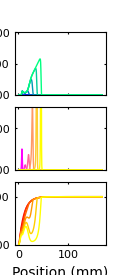

In [5]:
%matplotlib widget

adaptation_rate = 8e-4
length_scaling = 1.2
Length = 140*length_scaling
nx = int(350*15//10*length_scaling/0.8)
T= int(400*1.5)//2
nT=int(500)
# nT=1000

C0=0.001

Pprice_ideal = 2*(0.02/C0)
# Pprice_ideal = 3
speed = 0.10
D = 0.055*1e-2

Vmax = 3.25e-9 #ugP/um2/hour
Vmax = Vmax*1e6 #ugP.mm-2.hour-1
ylims = [(0,20),(0,3),(0,C0*1000*1.3)]
speed_aim = speed + 2*np.sqrt(0.039*D)
print(speed_aim)
drag = 1
r0 = 3e-3#mm 
r = r0 * (speed_aim/0.25)**(drag)

sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=3.6,
    D=D,
    ylims=ylims,
    r=r
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2))
# plt.savefig(os.path.join(path_figure,f'FigureAnew.pdf'), transparent=True, bbox_inches='tight')


0.14534848492300959
0.11313850063532402


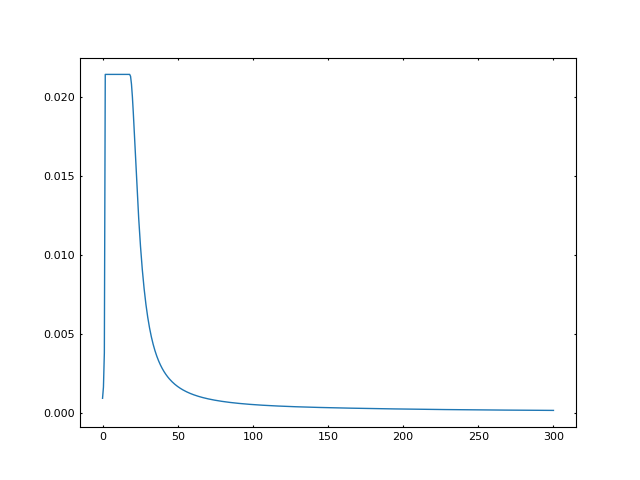

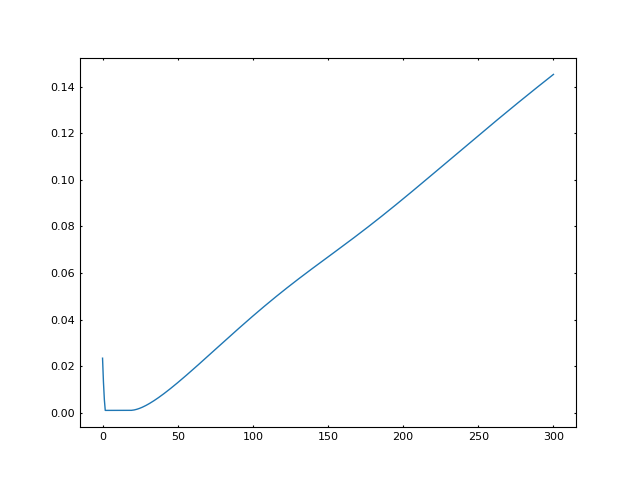

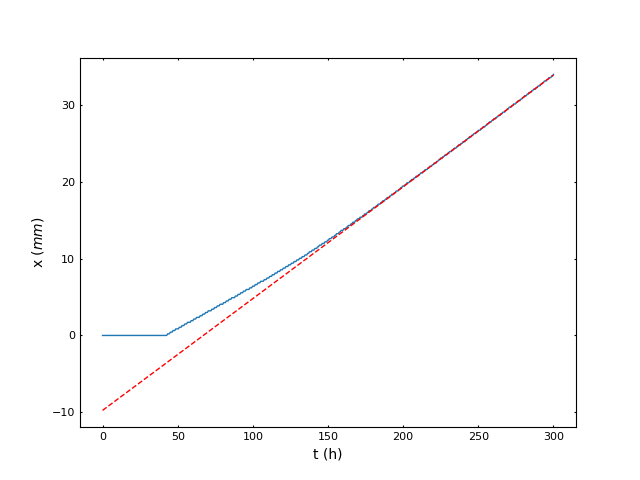

In [6]:
plot_overview(T,nT,Ds,alphavals,Length,nx)

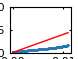

In [7]:
import numpy as np
import matplotlib.pyplot as plt
bp = 239
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.v_sval,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r)**2 #mm**3.h-1

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,1.5*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

ax.set_ylabel('$\Phi_C$  \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')
ax.set_ylim(0,1)

plt.savefig(os.path.join(path_figure,f'FigureAsub.pdf'), transparent=True, bbox_inches='tight')

# ax.set_ylabel('$\Phi_C$')
# ax.set_xlabel('$\Phi_P$')
# ax.set_xlim(0,0.1)


0.20926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

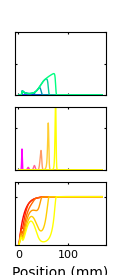

In [8]:
%matplotlib widget

speed = 0.20
speed_aim = speed + 2*np.sqrt(0.039*D)
print(speed_aim)
r0 = 3e-3#mm 
r = r0 * (speed_aim/0.25)**(drag)
sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=3.6,
    D=D,
    ylims=ylims,
    r=r
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2),remove_ylabels=True)
# plt.savefig(os.path.join(path_figure,f'FigureBnew.pdf'), transparent=True, bbox_inches='tight')


0.24764570070090575
0.2106226175349428


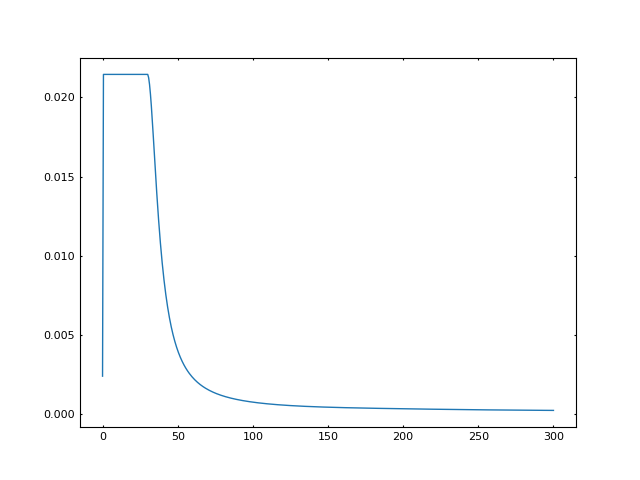

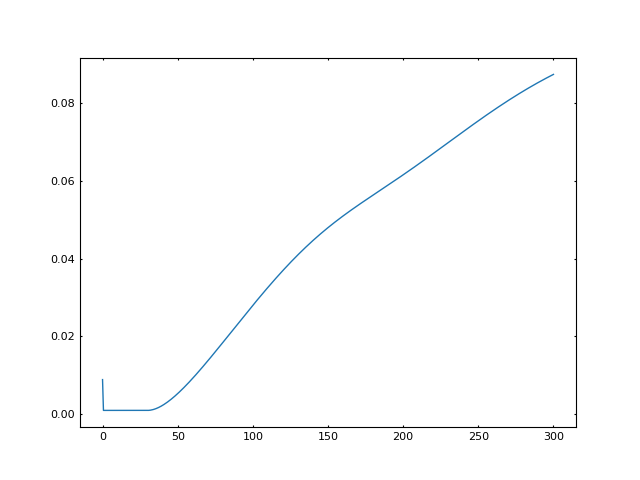

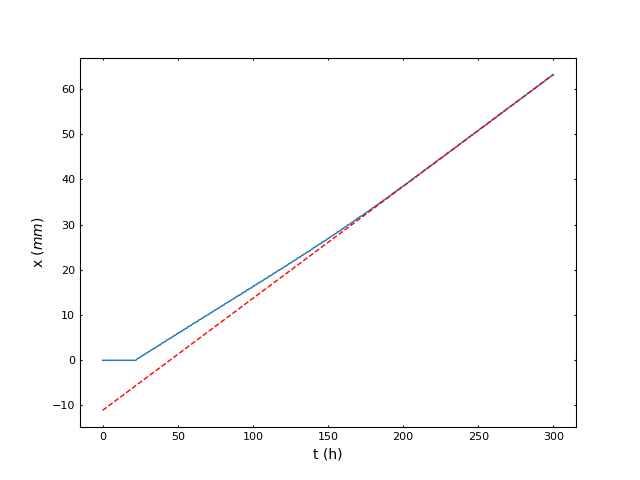

In [9]:
plot_overview(T,nT,Ds,alphavals,Length,nx)

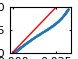

In [10]:
import numpy as np
import matplotlib.pyplot as plt
bp = 239
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.v_sval,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r)**2 #mm**3.h-1

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,1.5*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

ax.set_ylabel('$\Phi_C$  \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')
ax.set_ylim(0,1)

plt.savefig(os.path.join(path_figure,f'FigureBsub.pdf'), transparent=True, bbox_inches='tight')


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

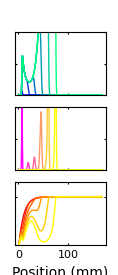

In [11]:
%matplotlib widget

C0 = 0.001
Pprice_ideal = 2*(0.02/C0)

ylims = [(0,2),(0,1),(0,C0*1000*1.3)]

sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=3.6,
    D=D,
    ylims=ylims,
    r=r
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2),remove_ylabels=True)


0.24764570070090575
0.2106226175349428


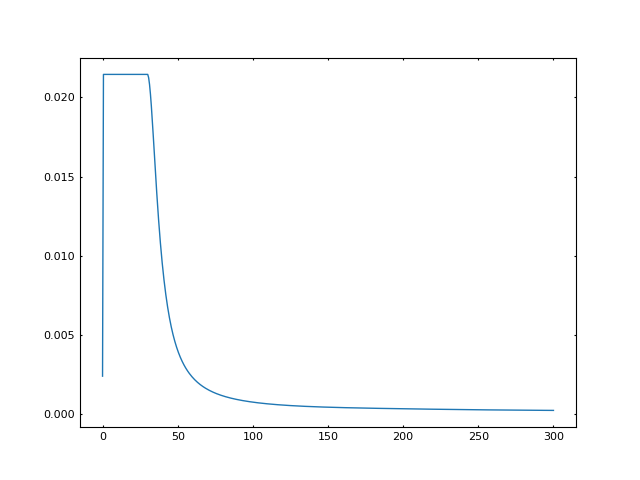

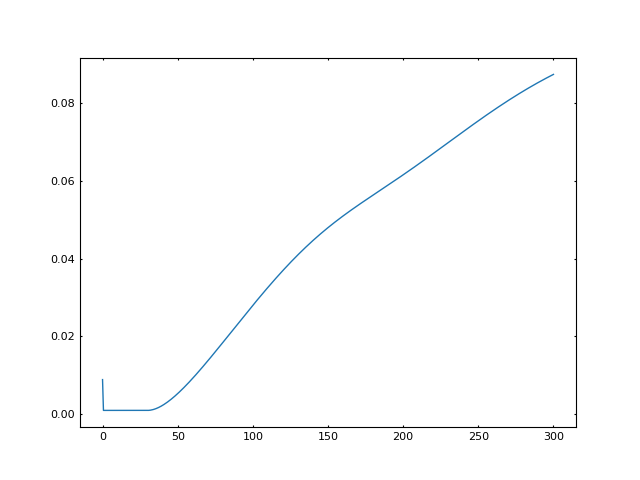

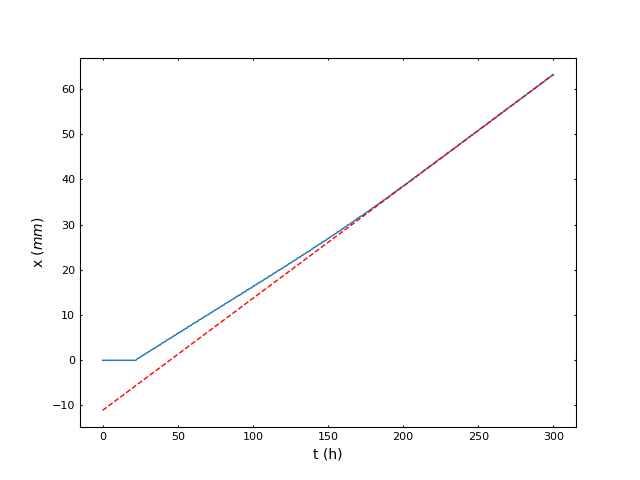

In [12]:
plot_overview(T,nT,Ds,alphavals,Length,nx)

0.15926282894152752


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


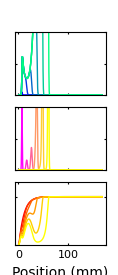

In [13]:
speed = 0.15
speed_aim = speed + 2*np.sqrt(0.039*D)
print(speed_aim)
drag = 1
r0 = 3e-3#mm 
r = r0 * (speed_aim/0.25)**(drag)
sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=3.6,
    D=D,
    ylims=ylims,
    r=r
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2),remove_ylabels=True)


0.19786828435190115
0.16223634053367217


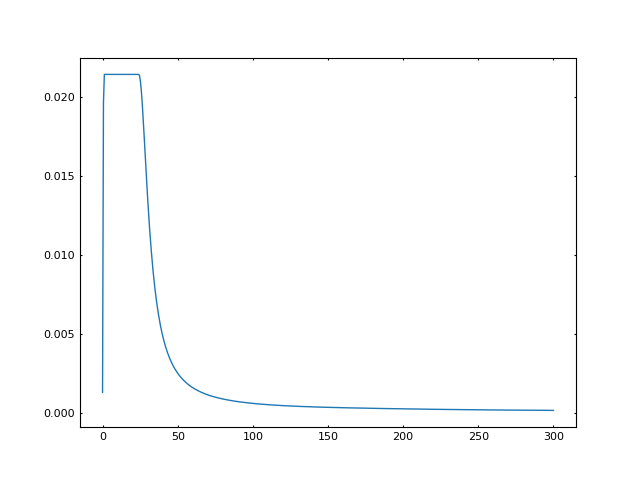

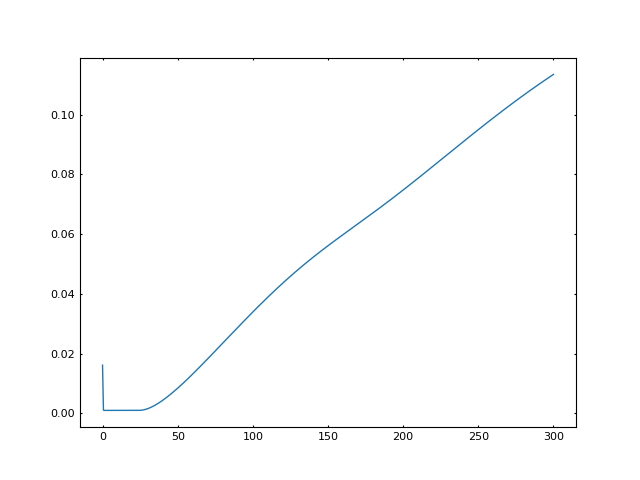

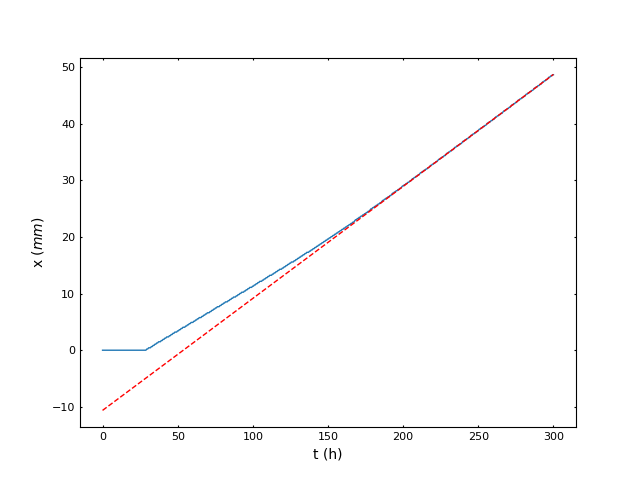

In [14]:
plot_overview(T,nT,Ds,alphavals,Length,nx)

In [16]:
T = 150
nT = 500
def get_dynamics(speed,C0,Pprice_ideal = 1/15,D = 0.0055,speed_aim=False):
    if not speed_aim:
        speed_aim = speed + 2*np.sqrt(0.039*D)
    print(speed_aim)
    r = r0 * (speed_aim/0.25)**(drag)
    sim = Simulation_soil(
        Length,
        nx,
        T,
        nT,
        speed=speed,
        C0=C0,
        Pprice_ideal=Pprice_ideal,
        Fmax=Vmax,
        adaptation_rate=adaptation_rate,
        D2=3.6,
        D=D,
        ylims=ylims,
        r=r
    )
    C_xt, rho_xt, n_xt,P_prices,_,_ = sim.integrate(plot=False,plot_axes = (0,1,2))
    poss = np.argmax(n_xt,axis=1)
    x = np.linspace(0,sim.T,sim.nT)
    y = np.array(poss)*sim.Length/sim.nx
    fit_coeffs = np.polyfit(x[3*sim.nT//4:], y[3*sim.nT//4:], 1)
    return(np.array(C_xt),np.array(rho_xt),np.array(n_xt),fit_coeffs[0])


In [17]:
speeds = np.linspace(0.1,0.2,5)
C0_values = np.exp(np.linspace(np.log(0.001), np.log(0.02),5))  # Adjust the number of points as needed
# dynamics = {(speed, C0): get_dynamics(speed, C0=C0, Pprice_ideal=2*(0.02/C0),D=D) 
#             for C0 in C0_values for speed in speeds}
dynamics = {(speed, C0): get_dynamics(speed, C0=C0, Pprice_ideal=2*(0.02/C0),D=D) 
            for C0 in C0_values for speed in speeds}

0.10926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.13426282894152752


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.15926282894152755


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.18426282894152754


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.20926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.10926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.13426282894152752


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.15926282894152755


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.18426282894152754


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.20926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.10926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.13426282894152752


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.15926282894152755


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.18426282894152754


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.20926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.10926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.13426282894152752


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.15926282894152755


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.18426282894152754


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.20926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.10926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.13426282894152752


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.15926282894152755


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.18426282894152754


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

0.20926282894152753


Simulating:   0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
bp = 239
X = np.linspace(1, Length, nx)
dx = Length/nx
Pacqu = {}

for speed in speeds:
    for C0 in C0_values:
        C_xt, rho_xt, n_xt,speed_observed = dynamics[(speed,C0)]
        Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
        Pacquisitions *= 2*sim.r*np.pi
        Pacqu[(speed,speed_observed,C0)] = np.mean(Pacquisitions)

In [19]:
import pandas as pd

# Your existing code
# X, dx, Pacqu, etc.

# Convert your data into a list of dictionaries
data_for_df = []
for key, value in Pacqu.items():
    speed_imposed,speed_observed, C0 = key
    data_for_df.append({'speed_imposed': speed_imposed,'speed_observed': speed_observed, 'C0': C0, 'MeanPacquisition': value})

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Display the DataFrame


df.to_csv('speedC0.csv')

average_p_rate = df.groupby('C0')['MeanPacquisition'].mean()

# Merge the averages back into the original DataFrame
df['average_P_rate'] = df['C0'].map(average_p_rate)
df['normalized_P_rate'] = df['MeanPacquisition']/df['average_P_rate']


def to_two_significant_digits(x):
    return float(f'{x:.2g}')

def to_three_significant_digits(x):
    return float(f'{x:.2g}')

# Create new columns with values formatted to two significant digits
df['speed_imposed'] = (df['speed_imposed'].apply(to_two_significant_digits)*1000).astype(int)
df['speed_observed'] = (df['speed_observed'].apply(to_two_significant_digits)*1000).astype(int)

df['C0'] = ((df['C0']*1000).apply(to_three_significant_digits))



Text(-0.7316272965879307, 0.5, '$[P]_{0}$ \n ($n g/mm^3$)')

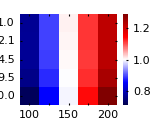

In [20]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
cm = 1/2.54  # centimeters in inches

import seaborn as sns
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots(figsize = (4*cm,3*cm))

pivot_df = df.pivot_table(index='C0', columns='speed_imposed', values='normalized_P_rate')
max_value = pivot_df.abs().max().max()  # Find the maximum absolute value
vmin, vmax = 2-max_value, max_value  # Set vmin and vmax for the colorbar

# Create the heatmap with symmetric colorbar
sns.heatmap(pivot_df, annot=False, cmap="seismic", ax=ax, vmin=vmin, vmax=vmax)

# sns.heatmap(pivot_df, annot=False, cmap="YlGnBu",cbar_kws={'label': 'relative \n P transfer'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

n = 2  # Set n to desired interval
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
# n = 2  # Set n to desired interval
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index % n != 0:
        # label.set_visible(False)
ax.set_xlabel('$v_{wave}$ ($\mu m/h$)')
ax.set_ylabel('$[P]_{0}$ \n ($n g/mm^3$)')
# plt.tight_layout()
# plt.savefig(os.path.join(path_figure,'Figure4modelB_changing_price.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
eegzeg

In [ ]:
%matplotlib widget

adaptation_rate = 8e-3
length_scaling = 1.2
Length = 140*length_scaling
nx = int(350*15//10*length_scaling/0.8)
T= int(400*1.5)
nT=int(600*1.5)
C0=0.002
Pprice_ideal = 2
speed = 0.12
D = 0.055

Vmax = 3.25e-9 #ugP/um2/hour
Vmax = Vmax*1e6 #ugP.mm-2.hour-1
ylims = [(0,12),(0,8),(0,C0*1000*1.3)]
speed_aim = speed + 2*np.sqrt(0.039*D)
# speed_aim = 0.17
print(speed_aim)
drag = 1
r0 = 3e-3#mm 
r = r0 * (speed_aim/0.25)**(drag)

sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=3.6,
    D=D,
    ylims=ylims,
    r=r
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2))
# plt.savefig(os.path.join(path_figure,f'FigureAnew.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
np.sqrt(0.001*0.1)

In [ ]:
x = np.linspace(0,T,nT)
fig, ax = plt.subplots()
ax.plot(x,Ds)

In [ ]:
x = np.linspace(0,T,nT)
fig, ax = plt.subplots()
ax.plot(x,alphavals)

In [ ]:
poss= [np.argmax(ns[50:]) for ns in n_xt]

x = np.linspace(0,T,nT)
y = np.array(poss)*Length/nx
fit_coeffs = np.polyfit(x[3*nT//4:], y[3*nT//4:], 1)
fit_line = np.polyval(fit_coeffs, x)

# Plot data and linear fit
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, fit_line, 'r--')
ax.set_xlabel('t (h)')
ax.set_ylabel('x ($mm$)')
print(fit_coeffs[0])

In [ ]:
plt.close("all")

speeds = np.linspace(0.10,0.26,10)
C0_values = np.exp(np.linspace(np.log(0.001), np.log(0.02), 10))  # Adjust the number of points as needed

dynamics = {(speed, C0): get_dynamics(speed, C0=C0, Pprice_ideal=2*(0.02/C0)**(1/1.2)) 
            for C0 in C0_values for speed in speeds}

In [ ]:
X = np.linspace(1, Length, nx)
dx = Length/nx
Pacqu = {}

for speed in speeds:
    for C0 in C0_values:
        C_xt, rho_xt, n_xt,speed_observed = dynamics[(speed,C0)]
        Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
        Pacquisitions *= 2*sim.r0*np.pi
        Pacqu[(speed_observed,C0)] = np.mean(Pacquisitions)

In [ ]:
import pandas as pd

# Your existing code
# X, dx, Pacqu, etc.

# Convert your data into a list of dictionaries
data_for_df = []
for key, value in Pacqu.items():
    speed, C0 = key
    data_for_df.append({'speed': speed, 'C0': C0, 'MeanPacquisition': value})

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Display the DataFrame


df.to_csv('speedC0.csv')

average_p_rate = df.groupby('C0')['MeanPacquisition'].mean()

# Merge the averages back into the original DataFrame
df['average_P_rate'] = df['C0'].map(average_p_rate)
df['normalized_P_rate'] = df['MeanPacquisition']/df['average_P_rate']


def to_two_significant_digits(x):
    return float(f'{x:.2g}')

# Create new columns with values formatted to two significant digits
df['speed'] = (df['speed'].apply(to_two_significant_digits)*1000).astype(int)
df['C0'] = (df['C0'].apply(to_two_significant_digits)*1000).astype(int)



In [ ]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
cm = 1/2.54  # centimeters in inches

import seaborn as sns
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots(figsize = (4*cm,3*cm))

pivot_df = df.pivot_table(index='C0', columns='speed', values='normalized_P_rate')
max_value = pivot_df.abs().max().max()  # Find the maximum absolute value
vmin, vmax = 2-max_value, max_value  # Set vmin and vmax for the colorbar

# Create the heatmap with symmetric colorbar
sns.heatmap(pivot_df, annot=False, cmap="seismic", ax=ax, vmin=vmin, vmax=vmax)

# sns.heatmap(pivot_df, annot=False, cmap="YlGnBu",cbar_kws={'label': 'relative \n P transfer'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

n = 2  # Set n to desired interval
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
# n = 2  # Set n to desired interval
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index % n != 0:
        # label.set_visible(False)
ax.set_xlabel('$v_{wave}$ ($\mu m/h$)')
ax.set_ylabel('$[P]_{0}$ \n ($n g/mm^3$)')
# plt.tight_layout()
# plt.savefig(os.path.join(path_figure,'Figure4modelB.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
plt.savefig(os.path.join(path_figure,f'FigureAnew.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/(C_xt+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r0*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.v_sval,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r0)**2 #mm**3.h-1
Ccost *= (sim.v_sval/0.25)**(sim.speed_penalty)

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration


In [ ]:
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,2*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

ax.set_ylabel('$\Phi_C$ \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ \n($\mu g/h$)')
# ax.set_ylabel('$\Phi_C$')
# ax.set_xlabel('$\Phi_P$')
ax.set_xlim(0,0.1)
ax.set_ylim(0,0.3)
# plt.savefig(os.path.join(path_figure,f'FigureBnew.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
Pprice_ideal = 3
speed = 0.26
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True,remove_ylabels = True)

In [ ]:
plt.savefig(os.path.join(path_figure,f'FigureA2new.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,2*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
ax.set_ylabel('$\Phi_C$ \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ \n ($\mu g/h$)')
ax.set_ylabel('')
# ax.set_xlabel('$\Phi_P$')
ax.set_xlim(0,0.1)
ax.set_ylim(0,0.3)

ax.set_yticklabels([])

plt.savefig(os.path.join(path_figure,f'FigureB2new.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
Km = 1e-3#umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km_snchepf = Km 

Km*1000
cm = 1/2.54  # centimeters in inches
%matplotlib widget
from dolfin import *
import numpy as np
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
Length = 140*0.4
nx = int(350*15//10*0.4/0.8)
plt.close("all")
set_log_active(False)
cmap3 = mpl.cm.get_cmap("autumn")
cmap4 = mpl.cm.get_cmap("summer")

class Simulation:
    """
    A class for simulating a finite element problem using the FEniCS framework.

    Attributes:
    -----------
    Length: float
        Length of the interval domain.
    nx: int
        Number of subdivisions in the mesh.
    nT: int
        Number of time steps.
    T: float
        Total simulation time.
    C0: float
        Initial concentration value.
    Fmax: float
        Maximum flux value.
    Pprice_ideal: float
        Ideal price value.
    width: float
        Width of the plot.
    height: float
        Height of the plot.
    """
    def __init__(self, Length=Length, nx=nx, nT=200, T=400, C0=10, Fmax=2, Pprice_ideal=20, width=3*cm, height=7*cm,speed = 0.230,adaptation_rate = 1e-4,drag = 0):
        self.Length = Length
        self.nx = nx
        self.dx = Length/nx
        self.nT = nT
        self.T = T
        self.dt = T/nT
        self.C0 = C0 #ug.mm-3
        self.Fmax = Fmax
        self.Pprice_ideal = Pprice_ideal
        self.width = width
        self.height = height
        self.speed = speed
        self.adaptation_rate = adaptation_rate
        self.speed_penalty = drag
        self._setup_simulation()
        self.r0 = 3e-3

    def _setup_simulation(self):
        # Set up the simulation: define mesh, function spaces, initial conditions, etc.
        """
        Sets up the initial conditions and parameters for the simulation.
        """
        # Create mesh and define function space
        self.mesh = IntervalMesh(self.nx, 1, self.Length)
        P1 = FiniteElement('P', interval, 1)
        element = MixedElement([P1, P1, P1])
        self.V = FunctionSpace(self.mesh, element)

        # Define initial conditions
        u0 = Expression(('0.9*exp(-1.2*pow(abs(x[0]-7),2))', 
                         f'(1-exp(-3*(x[0]-1)))*{self.C0}', '0*exp(-0.01*pow(abs(x[0]),2))'), degree=1)
        rexp = Expression(('1/x[0]', '0', '0'), degree=1)
        self.r = interpolate(rexp, self.V)
        self.invr, _, _ = split(self.r)
        self.u_n = interpolate(u0, self.V)

        # Splitting functions for later use
        self.u = Function(self.V)
        self.n, self.C, self.rho = split(self.u)   #mm-3,ug.mm-3,mm2.mm-3
        self.n_n, self.C_n, self.rho_n = split(self.u_n)
        self.v_1, self.v_0, self.v_2 = TestFunctions(self.V)

        # Set parameters and constants
        self.dt = self.T / self.nT
        self.alphval = 0.039 #.h-1
        self.alphval0 = self.alphval
        self.betaval = 0.022 #mm.h-1 length coefficient
        # self.betaval = 0.022/(2.5e-3) #mm.h-1 SA coefficient
        
        self.beta = Constant(self.betaval) #mm**4.h-1
        self.D = 0.0008 #mm**2.h-1
        self.D0 = self.D #mm**2.h-1
        
        self.D2 = Constant(3.6) #mm**2.h-1
        self.n_mid = 0.5*(self.n_n + self.n)
        self.v_sval = self.speed #mm.h-1
        self.s_scal = self.speed #mm.h-1
        self.v_s = Constant((self.v_sval,)) #mm.h-1
        self.Vmax = self.Fmax #ug.mm**-2.h-1
        self.Kp = Km_snchepf #ug.mm-3
        # Boundary conditions
        u_L = (Constant(0.0), Constant(0.0), Constant(0.0))
        u_R = (Constant(0.0), Constant(self.C0), Constant(0.0))
        bc_L0 = DirichletBC(self.V.sub(0), Constant(0.0), 'near(x[0], 1.0)')
        bc_L2 = DirichletBC(self.V.sub(2), Constant(0.0), 'near(x[0], 1.0)')
        # bc_L = DirichletBC(self.V, u_L, 'near(x[0], 1.0)')
        bc_R = DirichletBC(self.V, u_R, f'near(x[0], {self.Length})')
        self.bcs = [bc_L0,bc_L2, bc_R]

    def _make_F(self, alphval,D,sval):
        # Define the variational problem F
        alpha = Constant(alphval)
        D = Constant(D)
        s_scal = Constant(sval)
        # C_L =  self.C/bp
        
        # dn/dt
        F = self.n*self.v_1*dx - self.n_n*self.v_1*dx 
        # D lapplacian(n)
        F += D*dot(grad(self.n), grad(self.v_1))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*D*dot(grad(self.n), Constant((1,)))*self.v_1*self.dt*dx
        
        #v.grad(n)
        F += self.dt*dot(grad(self.n_mid),self.v_s)*self.v_1*dx
        # To account for cylindrical coordinates
        F += self.invr*self.dt*self.n_mid*Constant(self.v_sval)*self.v_1*dx
        
        #alpha*n - beta * n * rho
        F += self.beta*self.v_1*self.rho*(self.n)*self.dt*dx
        F -= alpha*(self.n)*self.v_1*self.dt*dx
        #d rho/dt = vn
        F -= self.dt*s_scal*self.n*self.v_2*dx-(self.rho-self.rho_n)*self.v_2*dx


        # dC/dt
        F += self.C*self.v_0*dx - self.C_n*self.v_0*dx #ug.mm-3
        # Vmax * rho * C/(C+Kp)
        #Expression without any radius change
        # F += 2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        #Expression with radius change
        F += (self.v_sval/0.25)**(self.speed_penalty)*2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        # Diffusion 
        F += self.D2*dot(grad(self.C), grad(self.v_0))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*self.D2*dot(grad(self.C), Constant((1,)))*self.v_0*self.dt*dx
        return F
    
    def integrate(self, plot=False,remove_ylabels = False):
        """
        Integrate the problem over time and optionally plot the results.
        Returns arrays of C(x, t), rho(x, t), and n(x, t) over the simulation.

        Parameters:
        -----------
        plot: bool
            If True, plot the results using matplotlib.

        Returns:
        --------
        C_xt: list of arrays
            Concentration C as a function of position x and time t.
        rho_xt: list of arrays
            Density rho as a function of position x and time t.
        n_xt: list of arrays
            Quantity n as a function of position x and time t.
        """
        # Initialize arrays to store C(x, t), rho(x, t), and n(x, t)
        C_xt = []
        rho_xt = []
        n_xt = []
        P_prices = []
        alphavals = []
        # Initialize matplotlib plots if needed
        if plot:
            fig, axs = plt.subplots(4, 1, figsize=(self.width, self.height*0.75))
            cmap = mpl.cm.get_cmap("winter")
            cmap2 = mpl.cm.get_cmap("spring")

        # Time-stepping loop
        V2 = FunctionSpace(self.mesh, 'P', 1)
        X = np.linspace(1, self.Length, self.nx)
        i=0
        tot_CCosts= [] 
        tot_Pacqus = []
        for t in tqdm(np.linspace(0, self.T, self.nT), desc="Simulating"):
            F = self._make_F(self.alphval,self.D,self.s_scal)
            solve(F == 0, self.u, self.bcs)
            self.u_n.assign(self.u)
            _n, _C, _rho = self.u.split()

            # Interpolate and store the results
            n_field = interpolate(_n, V2)
            rho_field = interpolate(_rho, V2)
            C_field = interpolate(_C, V2)
            Ccost = np.pi*np.sum([n_field(x)*x*self.dx*self.v_sval for x in X]) #mm.h-1
            Ccost *= np.pi*(self.r0)**2 #mm**3.h-1
            Ccost *= 1e-3  #mL.mm-1.h-1=dm**3.h-1
            
            Ccost *= 0.5*0.21*1.1 #g.h-1
            Ccost *= 1e6 #ug.h-1
            Ccost *= 2 #respiration
            
            Ccost *= (self.v_sval/0.25)**(self.speed_penalty)
            Pacquisition = np.pi*np.sum([self.Vmax*(C_field(x)/(C_field(x)+self.Kp))*rho_field(x)*x*self.dx for x in X]) #ug.h-1.mm-2
            Pacquisition *= 2*self.r0*np.pi #ug.mm-1
            # Pacquisition += 5e-4*np.exp(-t/100)
            tot_CCosts.append(Ccost) 
            tot_Pacqus.append(Pacquisition)
            # Pprice = Ccost/Pacquisition
            integrated_CCost = np.sum(tot_CCosts[-10*self.T//self.nT:])
            integrated_Pacqu = np.sum(tot_Pacqus[-10*self.T//self.nT:])
            
            Pprice = integrated_CCost/integrated_Pacqu

            alphavals.append(self.alphval)
            if t>=0:
                # self.s_scal = self.Pprice_ideal/Pprice*self.speed
                self.alphval = max(0.001,self.alphval + self.dt*self.adaptation_rate*(t/50)**2*signed_sqrt((self.Pprice_ideal-Pprice)/self.Pprice_ideal,alpha = 1))
            # print(self.alphval)
            self.D = self.D0*self.alphval0/self.alphval
            # print(2*(np.sqrt(self.D*self.alphval)))
            n_xt.append([n_field(x) for x in X])
            rho_xt.append([rho_field(x) for x in X])
            C_xt.append([C_field(x) for x in X])
            P_prices.append(Pprice)
            # print(Pprice,self.alphval)
            if plot and i % (self.nT//5) == 0:
                axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
                axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
                axs[2].plot(X, np.array(C_xt[-1])*1000, color=cmap3(t / self.T))
                Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]

                axs[3].plot(X, Pacq, color=cmap4(t / self.T))
                # break
            i+=1
            

        # Finalize plot settings if plotting
        if plot:
            axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
            axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
            satrho = np.median([rho for rho in rho_xt[-1] if rho>1e-10])
            
            # axs[0].hlines(satrho,np.min(X),np.max(X), color="red")
            
            # axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
            Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]
            axs[3].plot(X, Pacq, color=cmap4(t / self.T))
            axs[0].set_ylabel(r'$\rho$'+ '\n $(mm^{-1})$')
            axs[0].set_xticklabels([])
            axs[0].set_ylim(0,8)
            
            axs[1].set_ylabel('$n$ \n $(mm^{-2})$')
            axs[1].set_xticklabels([])
            axs[1].set_ylim(0,4)
            
#             axs[2].set_ylabel('$[P]$ \n ($ng/ mm^{3}$)')
#             axs[2].set_xticklabels([])
#             axs[2].set_ylim(0,2)
            
#             axs[3].set_ylabel('$\phi_P$ \n ($ng/mm^{3}/h$)')

            axs[1].set_xlabel('position \n ($mm$)')
#             axs[3].set_ylim(0,0.30)

            formatter = ticker.FormatStrFormatter('%.2f')  # Adjust format as needed

            for ax in axs:
                ax.yaxis.set_major_formatter(formatter)
            if remove_ylabels:
                for ax in axs:
                    ax.set_ylabel('')
                    ax.set_yticklabels([])

            plt.show()

        return C_xt, rho_xt, n_xt,P_prices,alphavals
        

# Example usage:
adaptation_rate = 8e-3
C0=0.0014 #ug/mm2
Pprice_ideal = 3
speed = 0.17 #mm/h
T = 100
nT= 200
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True)


In [ ]:
Km = 5.8e-4#umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km*1000
cm = 1/2.54  # centimeters in inches
%matplotlib widget
from dolfin import *
import numpy as np
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
Length = 140*0.4
nx = int(350*15//10*0.4/0.8)
plt.close("all")
set_log_active(False)
cmap3 = mpl.cm.get_cmap("autumn")
cmap4 = mpl.cm.get_cmap("summer")

class Simulation:
    """
    A class for simulating a finite element problem using the FEniCS framework.

    Attributes:
    -----------
    Length: float
        Length of the interval domain.
    nx: int
        Number of subdivisions in the mesh.
    nT: int
        Number of time steps.
    T: float
        Total simulation time.
    C0: float
        Initial concentration value.
    Fmax: float
        Maximum flux value.
    Pprice_ideal: float
        Ideal price value.
    width: float
        Width of the plot.
    height: float
        Height of the plot.
    """
    def __init__(self, Length=Length, nx=nx, nT=200, T=400, C0=10, Fmax=2, Pprice_ideal=20, width=3*cm, height=7*cm,speed = 0.230,adaptation_rate = 1e-4,drag = 0):
        self.Length = Length
        self.nx = nx
        self.dx = Length/nx
        self.nT = nT
        self.T = T
        self.dt = T/nT
        self.C0 = C0 #ug.mm-3
        self.Fmax = Fmax
        self.Pprice_ideal = Pprice_ideal
        self.width = width
        self.height = height
        self.speed = speed
        self.adaptation_rate = adaptation_rate
        self.speed_penalty = drag
        self._setup_simulation()
        self.r0 = 3e-3

    def _setup_simulation(self):
        # Set up the simulation: define mesh, function spaces, initial conditions, etc.
        """
        Sets up the initial conditions and parameters for the simulation.
        """
        # Create mesh and define function space
        self.mesh = IntervalMesh(self.nx, 1, self.Length)
        P1 = FiniteElement('P', interval, 1)
        element = MixedElement([P1, P1, P1])
        self.V = FunctionSpace(self.mesh, element)

        # Define initial conditions
        u0 = Expression(('0.9*exp(-1.2*pow(abs(x[0]-7),2))', 
                         f'(1-exp(-3*(x[0]-1)))*{self.C0}', '0*exp(-0.01*pow(abs(x[0]),2))'), degree=1)
        rexp = Expression(('1/x[0]', '0', '0'), degree=1)
        self.r = interpolate(rexp, self.V)
        self.invr, _, _ = split(self.r)
        self.u_n = interpolate(u0, self.V)

        # Splitting functions for later use
        self.u = Function(self.V)
        self.n, self.C, self.rho = split(self.u)   #mm-3,ug.mm-3,mm2.mm-3
        self.n_n, self.C_n, self.rho_n = split(self.u_n)
        self.v_1, self.v_0, self.v_2 = TestFunctions(self.V)

        # Set parameters and constants
        self.dt = self.T / self.nT
        self.alphval = 0.039 #.h-1
        self.alphval0 = self.alphval
        self.betaval = 0.022 #mm.h-1 length coefficient
        # self.betaval = 0.022/(2.5e-3) #mm.h-1 SA coefficient
        
        self.beta = Constant(self.betaval) #mm**4.h-1
        self.D = 0.0008 #mm**2.h-1
        self.D0 = self.D #mm**2.h-1
        
        self.D2 = Constant(0.36) #mm**2.h-1
        self.n_mid = 0.5*(self.n_n + self.n)
        self.v_sval = self.speed #mm.h-1
        self.s_scal = self.speed #mm.h-1
        self.v_s = Constant((self.v_sval,)) #mm.h-1
        self.Vmax = self.Fmax #ug.mm**-2.h-1
        self.Kp = Km_snchepf #ug.mm-3
        # Boundary conditions
        u_L = (Constant(0.0), Constant(0.0), Constant(0.0))
        u_R = (Constant(0.0), Constant(self.C0), Constant(0.0))
        bc_L = DirichletBC(self.V, u_L, 'near(x[0], 1.0)')
        bc_R = DirichletBC(self.V, u_R, f'near(x[0], {self.Length})')
        self.bcs = [bc_L, bc_R]

    def _make_F(self, alphval,D,sval):
        # Define the variational problem F
        alpha = Constant(alphval)
        D = Constant(D)
        s_scal = Constant(sval)
        # C_L =  self.C/bp
        
        # dn/dt
        F = self.n*self.v_1*dx - self.n_n*self.v_1*dx 
        # D lapplacian(n)
        F += D*dot(grad(self.n), grad(self.v_1))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*D*dot(grad(self.n), Constant((1,)))*self.v_1*self.dt*dx
        
        #v.grad(n)
        F += self.dt*dot(grad(self.n_mid),self.v_s)*self.v_1*dx
        # To account for cylindrical coordinates
        F += self.invr*self.dt*self.n_mid*Constant(self.v_sval)*self.v_1*dx
        
        #alpha*n - beta * n * rho
        F += self.beta*self.v_1*self.rho*(self.n)*self.dt*dx
        F -= alpha*(self.n)*self.v_1*self.dt*dx
        #d rho/dt = vn
        F -= self.dt*s_scal*self.n*self.v_2*dx-(self.rho-self.rho_n)*self.v_2*dx


        # dC/dt
        F += self.C*self.v_0*dx - self.C_n*self.v_0*dx #ug.mm-3
        # Vmax * rho * C/(C+Kp)
        #Expression without any radius change
        # F += 2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        #Expression with radius change
        F += (self.v_sval/0.25)**(self.speed_penalty)*2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        # Diffusion 
        F += self.D2*dot(grad(self.C), grad(self.v_0))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*self.D2*dot(grad(self.C), Constant((1,)))*self.v_0*self.dt*dx
        return F
    
    def integrate(self, plot=False,remove_ylabels = False):
        """
        Integrate the problem over time and optionally plot the results.
        Returns arrays of C(x, t), rho(x, t), and n(x, t) over the simulation.

        Parameters:
        -----------
        plot: bool
            If True, plot the results using matplotlib.

        Returns:
        --------
        C_xt: list of arrays
            Concentration C as a function of position x and time t.
        rho_xt: list of arrays
            Density rho as a function of position x and time t.
        n_xt: list of arrays
            Quantity n as a function of position x and time t.
        """
        # Initialize arrays to store C(x, t), rho(x, t), and n(x, t)
        C_xt = []
        rho_xt = []
        n_xt = []
        P_prices = []
        alphavals = []
        # Initialize matplotlib plots if needed
        if plot:
            fig, axs = plt.subplots(4, 1, figsize=(self.width, self.height*0.75))
            cmap = mpl.cm.get_cmap("winter")
            cmap2 = mpl.cm.get_cmap("spring")

        # Time-stepping loop
        V2 = FunctionSpace(self.mesh, 'P', 1)
        X = np.linspace(1, self.Length, self.nx)
        i=0
        tot_CCosts= [] 
        tot_Pacqus = []
        for t in tqdm(np.linspace(0, self.T, self.nT), desc="Simulating"):
            F = self._make_F(self.alphval,self.D,self.s_scal)
            solve(F == 0, self.u, self.bcs)
            self.u_n.assign(self.u)
            _n, _C, _rho = self.u.split()

            # Interpolate and store the results
            n_field = interpolate(_n, V2)
            rho_field = interpolate(_rho, V2)
            C_field = interpolate(_C, V2)
            Ccost = np.pi*np.sum([n_field(x)*x*self.dx*self.v_sval for x in X]) #mm.h-1
            Ccost *= np.pi*(self.r0)**2 #mm**3.h-1
            Ccost *= 1e-3  #mL.mm-1.h-1=dm**3.h-1
            
            Ccost *= 0.5*0.21*1.1 #g.h-1
            Ccost *= 1e6 #ug.h-1
            Ccost *= 2 #respiration
            
            Ccost *= (self.v_sval/0.25)**(self.speed_penalty)
            Pacquisition = np.pi*np.sum([self.Vmax*(C_field(x)/(C_field(x)+self.Kp))*rho_field(x)*x*self.dx for x in X]) #ug.h-1.mm-2
            Pacquisition *= 2*self.r0*np.pi #ug.mm-1
            # Pacquisition += 5e-4*np.exp(-t/100)
            tot_CCosts.append(Ccost) 
            tot_Pacqus.append(Pacquisition)
            # Pprice = Ccost/Pacquisition
            integrated_CCost = np.sum(tot_CCosts[-10*self.T//self.nT:])
            integrated_Pacqu = np.sum(tot_Pacqus[-10*self.T//self.nT:])
            
            Pprice = integrated_CCost/integrated_Pacqu

            alphavals.append(self.alphval)
            if t>=0:
                # self.s_scal = self.Pprice_ideal/Pprice*self.speed
                self.alphval = max(0.001,self.alphval + self.dt*self.adaptation_rate*(t/50)**2*signed_sqrt((self.Pprice_ideal-Pprice)/self.Pprice_ideal,alpha = 1))
            # print(self.alphval)
            self.D = self.D0*self.alphval0/self.alphval
            # print(2*(np.sqrt(self.D*self.alphval)))
            n_xt.append([n_field(x) for x in X])
            rho_xt.append([rho_field(x) for x in X])
            C_xt.append([C_field(x) for x in X])
            P_prices.append(Pprice)
            # print(Pprice,self.alphval)
            if plot and i % (self.nT//5) == 0:
                axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
                axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
                axs[2].plot(X, np.array(C_xt[-1])*1000, color=cmap3(t / self.T))
                Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]

                axs[3].plot(X, Pacq, color=cmap4(t / self.T))
                # break
            i+=1
            

        # Finalize plot settings if plotting
        if plot:
            axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
            axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
            satrho = np.median([rho for rho in rho_xt[-1] if rho>1e-10])
            
            # axs[0].hlines(satrho,np.min(X),np.max(X), color="red")
            
            # axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
            Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]
            axs[3].plot(X, Pacq, color=cmap4(t / self.T))
            axs[0].set_ylabel(r'$\rho$'+ '\n $(mm^{-1})$')
            axs[0].set_xticklabels([])
            axs[0].set_ylim(0,8)
            
            axs[1].set_ylabel('$n$ \n $(mm^{-2})$')
            axs[1].set_xticklabels([])
            axs[1].set_ylim(0,4)
            
#             axs[2].set_ylabel('$[P]$ \n ($ng/ mm^{3}$)')
#             axs[2].set_xticklabels([])
#             axs[2].set_ylim(0,2)
            
#             axs[3].set_ylabel('$\phi_P$ \n ($ng/mm^{3}/h$)')

            axs[1].set_xlabel('position \n ($mm$)')
#             axs[3].set_ylim(0,0.30)

            formatter = ticker.FormatStrFormatter('%.2f')  # Adjust format as needed

            for ax in axs:
                ax.yaxis.set_major_formatter(formatter)
            if remove_ylabels:
                for ax in axs:
                    ax.set_ylabel('')
                    ax.set_yticklabels([])

            plt.show()

        return C_xt, rho_xt, n_xt,P_prices,alphavals
        

# Example usage:
adaptation_rate = 8e-3
C0=0.0014 #ug/mm2
Pprice_ideal = 3
speed = 0.17 #mm/h
T = 100
nT= 200
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True)


In [ ]:
Pprice_ideal = 3
speed = 0.26
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True,remove_ylabels = True)